 **Regressão polinomial para predição do preço de alguel de um imóvel**

O objetivo deste projeto é utilizar a regressão polinomial para prever o preço do aluguel de imóveis com base em outras informações como condomínio, número de quartos, metragem, e outros.

# 1 - Verificação dos dados e importação das bibliotecas

In [ ]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('ALUGUEL_MOD34.csv', delimiter=';')
df.head()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Não há dados faltantes e os tipos estão adequados.

In [ ]:
#Separação das variáveis
x = df[['Metragem']]
y = df['Valor_Aluguel']

Neste projeto, vamos fazer a análise baseado apenas na variável Metragem.

# 2 - Modelo com grau =2

In [ ]:
poly_features = PolynomialFeatures(degree=2) #Transformando a variável necessária em grau 2.
x_poly = poly_features.fit_transform(x)
x_poly

array([[1.0000e+00, 4.8000e+01, 2.3040e+03],
       [1.0000e+00, 5.0000e+01, 2.5000e+03],
       [1.0000e+00, 4.0000e+01, 1.6000e+03],
       ...,
       [1.0000e+00, 2.6600e+02, 7.0756e+04],
       [1.0000e+00, 6.0000e+02, 3.6000e+05],
       [1.0000e+00, 2.4800e+02, 6.1504e+04]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Tamanho do x_train:", x_train.shape)
print("Tamanho do y_train:", y_train.shape)

Tamanho do x_train: (5762, 3)
Tamanho do y_train: (5762,)


In [ ]:
print("Tamanho do x_test:", x_test.shape)
print("Tamanho do y_test:", y_test.shape)

Tamanho do x_test: (1441, 3)
Tamanho do y_test: (1441,)


A quantidade e o grau das variáveis separadas estão corretas.

In [ ]:
y_pred = model.predict(x_test) #predição do modelo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


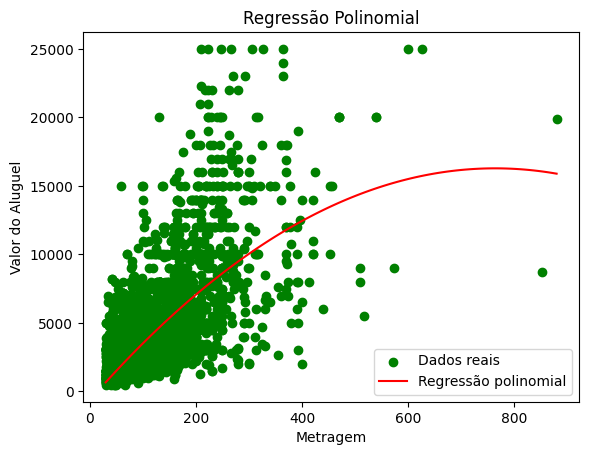

In [ ]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) #configurando os dados para gerar o gráfico
x_poly_range = poly_features.transform(x_range)
y_pred_range = model.predict(x_poly_range)

plt.scatter(x, y, color='green', label='Dados reais')#gerando a visualização
plt.plot(x_range, y_pred_range, color='red', label='Regressão polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()

In [ ]:
r2_grau2 = r2_score(y_test, y_pred) #verificando as métricas
mse_grau2 = mean_squared_error(y_test, y_pred)
rmse_grau2 = np.sqrt(mse_grau2)
print("R²:", r2_grau2)
print("MSE:", mse_grau2)
print("RMSE:", rmse_grau2)

R²: 0.5710538044099789
MSE: 4645995.564625916
RMSE: 2155.4571590792325


A regressão polinomial de grau 2 teve um ajuste de 57% aos dados do dataframe

# 5 - Modelo com grau = 4.

In [ ]:
poly_features4 = PolynomialFeatures(degree=4) #repetindo a análise para grau =4
x_poly4 = poly_features4.fit_transform(x)
x_poly4

array([[1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06],
       [1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05,
        6.25000000e+06],
       [1.00000000e+00, 4.00000000e+01, 1.60000000e+03, 6.40000000e+04,
        2.56000000e+06],
       ...,
       [1.00000000e+00, 2.66000000e+02, 7.07560000e+04, 1.88210960e+07,
        5.00641154e+09],
       [1.00000000e+00, 6.00000000e+02, 3.60000000e+05, 2.16000000e+08,
        1.29600000e+11],
       [1.00000000e+00, 2.48000000e+02, 6.15040000e+04, 1.52529920e+07,
        3.78274202e+09]])

In [ ]:
x_train4, x_test4, y_train, y_test = train_test_split(x_poly4, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train4,y_train)

LinearRegression()

In [ ]:
y_pred4 = model.predict(x_test4)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


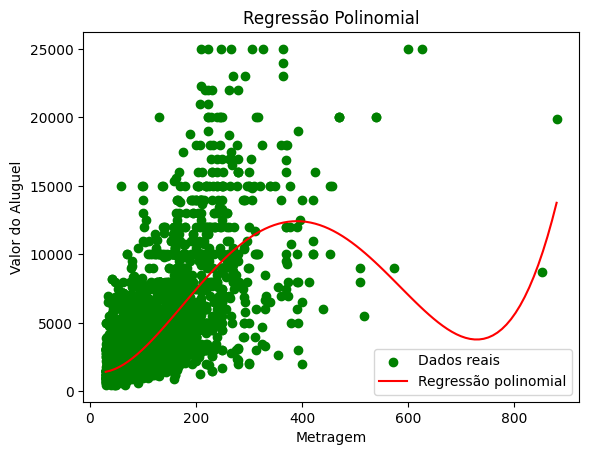

In [ ]:
x_range4 = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) #Ajustando os dados para o gráfico
x_poly_range4 = poly_features4.transform(x_range4)
y_pred_range4 = model.predict(x_poly_range4)

plt.scatter(x, y, color='green', label='Dados reais') #Gerando a visualização
plt.plot(x_range4, y_pred_range4, color='red', label='Regressão polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()

In [ ]:
r2_grau4 = r2_score(y_test, y_pred4) #Avaliando as métricas
mse_grau4 = mean_squared_error(y_test, y_pred4)
rmse_grau4 = np.sqrt(mse_grau4)
print("R²:", r2_grau4)
print("MSE:", mse_grau4)
print("RMSE:", rmse_grau4)

R²: 0.5584521798250465
MSE: 4782486.09078187
RMSE: 2186.889592727962


Note que para um grau maior, o nosso modelo teve um desempenho inferior. Agora ele apresentou um ajuste de 56% aos dados da base.